<a href="https://colab.research.google.com/github/jorgegonzaleza/EjerciciosMachineLearning/blob/main/Futbol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PREDICCIÓN COSTE TRASPASO JUGADORES

# 1. IMPORTAMOS LIBRERÍAS Y LEEMOS EL CSV

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df = pd.read_csv("/content/drive/MyDrive/transfers.csv")


In [8]:
df.head(10)

,player_id,transfer_date,transfer_season,from_club_id,to_club_id,from_club_name,to_club_name,transfer_fee,market_value_in_eur,player_name
0,16136,2026-07-01,26/27,417,123,OGC Nice,Retired,NaN,500000.0,Dante
1,1138758,2026-07-01,26/27,336,631,Sporting CP,Chelsea,52140000.0,45000000.0,Geovany Quenda
2,195778,2026-06-30,25/26,79,27,VfB Stuttgart,Bayern Munich,0.0,12000000.0,Alexander Nübel
3,569033,2026-06-30,25/26,39,27,1.FSV Mainz 05,Bayern Munich,0.0,4000000.0,Armindo Sieb
4,626913,2026-06-30,25/26,398,380,Lazio,Salernitana,0.0,15000000.0,Boulaye Dia
5,743395,2026-06-30,25/26,9010,15,FCV Dender EH,B. Leverkusen,0.0,1500000.0,Noah Mbamba
6,887834,2026-06-30,25/26,979,1023,Moreirense,Palmeiras,0.0,1000000.0,Michel
7,1047109,2026-06-30,25/26,2672,265,APO Levadiakos,Panathinaikos,0.0,300000.0,Georgios Katris
8,128223,2026-01-20,25/26,141,5,Galatasaray,AC Milan,0.0,13000000.0,Álvaro Morata
9,955213,2026-01-01,25/26,10690,36949,Zorya Lugansk,Dynamo Kyiv U19,0.0,50000.0,Andriy Matkevych


### Información de la base de datos

In [9]:
#VEMOS SI HAY VALORES NULOS
df.isna().any()

,0
player_id,False
transfer_date,False
transfer_season,False
from_club_id,False
to_club_id,False
from_club_name,False
to_club_name,False
transfer_fee,True
market_value_in_eur,True
player_name,False


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79646 entries, 0 to 79645
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_id            79646 non-null  int64  
 1   transfer_date        79646 non-null  object 
 2   transfer_season      79646 non-null  object 
 3   from_club_id         79646 non-null  int64  
 4   to_club_id           79646 non-null  int64  
 5   from_club_name       79646 non-null  object 
 6   to_club_name         79646 non-null  object 
 7   transfer_fee         51931 non-null  float64
 8   market_value_in_eur  49330 non-null  float64
 9   player_name          79646 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 6.1+ MB


In [52]:
df.describe()

,player_id,from_club_id,to_club_id,transfer_fee,market_value_in_eur
count,7.964600e+04,79646.000000,79646.000000,5.193100e+04,4.933000e+04
mean,4.232426e+05,17158.688220,12902.337556,1.115650e+06,2.488055e+06
std,2.694543e+05,23567.526887,20482.855861,5.258424e+06,5.901403e+06
min,3.333000e+03,1.000000,1.000000,0.000000e+00,1.000000e+04
25%,2.073020e+05,853.000000,589.000000,0.000000e+00,2.250000e+05
50%,3.711975e+05,6646.000000,2976.000000,0.000000e+00,6.000000e+05
75%,5.971530e+05,24226.000000,14685.000000,0.000000e+00,2.000000e+06
max,1.391239e+06,129264.000000,128258.000000,1.800000e+08,1.800000e+08


## 2. AJUSTES BASE DE DATOS

### Hacemos una copia del original para no modificarlo

In [12]:
df_clean=df.copy()

### Eliminación de filas con: valores nulos en traspasos, retiradas o agentes libre

In [13]:
#BUSCAMOS EL VALOR ASOCIADO AL CLUB "RETIRADO"" PARA ELIMINARLO
df.query("to_club_id <= 123 and to_club_id >= 123")

,player_id,transfer_date,transfer_season,from_club_id,to_club_id,from_club_name,to_club_name,transfer_fee,market_value_in_eur,player_name
0,16136,2026-07-01,26/27,417,123,OGC Nice,Retired,NaN,500000.0,Dante
24,31067,2025-07-01,25/26,468,123,Sparta R.,Retired,NaN,100000.0,Jonathan de Guzmán
25,34784,2025-07-01,25/26,467,123,NEC Nijmegen,Retired,NaN,100000.0,Lasse Schöne
26,39728,2025-07-01,25/26,12,123,AS Roma,Retired,NaN,2500000.0,Mats Hummels
27,42710,2025-07-01,25/26,1096,123,Royal Antwerp,Retired,NaN,2200000.0,Toby Alderweireld
...,...,...,...,...,...,...,...,...,...,...
9414,204144,2024-01-09,23/24,5724,123,Randers FC,Retired,NaN,150000.0,Alexander Nybo
9645,91727,2024-01-01,23/24,53646,123,Polissya,Retired,NaN,50000.0,Andriy Gitchenko
9655,181469,2024-01-01,23/24,3385,123,Panserraikos,Retired,NaN,200000.0,Tomas Hajek
9991,69683,2023-11-21,23/24,3999,123,PAS Lamia,Retired,NaN,700000.0,Alan Dzagoev


In [14]:
#ELIMINAMOS LOS TRANSPASOS QUE SON RETIRADAS
df_clean=df_clean[df_clean["to_club_id"]!=123]

In [15]:
#BUSCAMOS EL VALOR ASOCIADO AL CLUB "SIN EQUIPO"" PARA ELIMINARLO
df.query("to_club_id <= 515 and to_club_id >= 515")

,player_id,transfer_date,transfer_season,from_club_id,to_club_id,from_club_name,to_club_name,transfer_fee,market_value_in_eur,player_name
21,58358,2025-08-01,25/26,27,515,Bayern Munich,Without Club,NaN,6000000.0,Thomas Müller
29,44996,2025-07-01,25/26,36,515,Fenerbahce,Without Club,NaN,100000.0,Serdar Aziz
30,55508,2025-07-01,25/26,269,515,Holstein Kiel,Without Club,NaN,500000.0,Lewis Holtby
31,57796,2025-07-01,24/25,2036,515,Heidenheim,Without Club,NaN,250000.0,Vitus Eicher
32,58995,2025-07-01,25/26,86,515,Werder Bremen,Without Club,NaN,1000000.0,Anthony Jung
...,...,...,...,...,...,...,...,...,...,...
77436,255353,2008-07-01,08/09,14651,515,Brist. Rov. U18,Without Club,NaN,NaN,Christian Doidge
77556,91845,2008-05-01,08/09,88015,515,FC Seoul U18,Without Club,NaN,NaN,Heung-min Son
77610,52403,2008-01-01,07/08,128,515,Skoda Xanthi,Without Club,NaN,400000.0,Dimitrios Siovas
77658,98067,2008-01-01,07/08,31030,515,Hamilton A. U17,Without Club,NaN,NaN,Zander Clark


In [16]:
#ELIMINAMOS LOS TRANSPASOS QUE SON SIN EQUIPO(NO SON TRASPASOS)
df_clean=df_clean[df_clean["to_club_id"]!=515]

In [17]:
#ELIMINAMOS FILAS QUE NO TIENEN LA CANTIDAD DE TRASPASO
df_clean=df_clean[df_clean["transfer_fee"].notna()]

### Eliminación Características

In [18]:
#ELIMINAMOS ATRIBUTOS DUPLICADOS Y TRANSFER_DATE, AUNQUE PODRÍA SER INTERESANTE
del df_clean["from_club_name"]
del df_clean["to_club_name"]
del df_clean["player_name"]
del df_clean["transfer_date"]

### Conversión de características a numérico

In [19]:
#CONVERTIMOS CATEGÓRICO A NUMÉRICO
df_clean=pd.get_dummies(df_clean,dtype='int')

In [20]:
df_clean

,player_id,from_club_id,to_club_id,transfer_fee,market_value_in_eur,transfer_season_00/01,transfer_season_01/02,transfer_season_02/03,transfer_season_03/04,transfer_season_04/05,...,transfer_season_24/25,transfer_season_25/26,transfer_season_26/27,transfer_season_93/94,transfer_season_94/95,transfer_season_95/96,transfer_season_96/97,transfer_season_97/98,transfer_season_98/99,transfer_season_99/00
1,1138758,336,631,52140000.0,45000000.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,195778,79,27,0.0,12000000.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,569033,39,27,0.0,4000000.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,626913,398,380,0.0,15000000.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,743395,9010,15,0.0,1500000.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79637,61989,55343,55341,0.0,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
79640,68864,79611,32804,0.0,NaN,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
79641,35207,42281,11896,0.0,NaN,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
79644,40680,47320,47318,0.0,NaN,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [21]:
#VEMOS YA QUE TODAS LAS CATEGORIAS SON  NUMERICAS
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51921 entries, 1 to 79645
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   player_id              51921 non-null  int64  
 1   from_club_id           51921 non-null  int64  
 2   to_club_id             51921 non-null  int64  
 3   transfer_fee           51921 non-null  float64
 4   market_value_in_eur    41033 non-null  float64
 5   transfer_season_00/01  51921 non-null  int64  
 6   transfer_season_01/02  51921 non-null  int64  
 7   transfer_season_02/03  51921 non-null  int64  
 8   transfer_season_03/04  51921 non-null  int64  
 9   transfer_season_04/05  51921 non-null  int64  
 10  transfer_season_05/06  51921 non-null  int64  
 11  transfer_season_06/07  51921 non-null  int64  
 12  transfer_season_07/08  51921 non-null  int64  
 13  transfer_season_08/09  51921 non-null  int64  
 14  transfer_season_09/10  51921 non-null  int64  
 15  transfe

### Completamos valores nulos con

In [22]:
#VEMOS ANALISIS DE CATEGORIAS
#df_clean.describe()

In [23]:
#mediana_market_value=df_clean["market_value_in_eur"].median()

In [24]:
#df_clean["market_value_in_eur"]=df_clean["market_value_in_eur"].fillna(mediana_market_value)

In [25]:
#df_clean

In [26]:
#ELIMINAMOS FILAS QUE NO TIENEN LA CANTIDAD DE TRASPASO
df_clean=df_clean[df_clean["market_value_in_eur"].notna()]

In [27]:
df_clean

,player_id,from_club_id,to_club_id,transfer_fee,market_value_in_eur,transfer_season_00/01,transfer_season_01/02,transfer_season_02/03,transfer_season_03/04,transfer_season_04/05,...,transfer_season_24/25,transfer_season_25/26,transfer_season_26/27,transfer_season_93/94,transfer_season_94/95,transfer_season_95/96,transfer_season_96/97,transfer_season_97/98,transfer_season_98/99,transfer_season_99/00
1,1138758,336,631,52140000.0,45000000.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,195778,79,27,0.0,12000000.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,569033,39,27,0.0,4000000.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,626913,398,380,0.0,15000000.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,743395,9010,15,0.0,1500000.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79055,29391,3034,371,0.0,50000.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
79062,19041,5299,116,0.0,50000.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
79063,14555,399,31,1400000.0,750000.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
79066,12029,1049,7971,0.0,1750000.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# 3. Correlación entre características

In [28]:
# Mostrar la correlación entre los atributos del conjunto de datos
corr_matrix = df_clean.corr()
corr_matrix["transfer_fee"].sort_values(ascending=False)

,transfer_fee
transfer_fee,1.000000
market_value_in_eur,0.673571
transfer_season_26/27,0.042631
transfer_season_19/20,0.025939
transfer_season_24/25,0.023190
transfer_season_25/26,0.022662
transfer_season_17/18,0.014196
transfer_season_18/19,0.005184
transfer_season_16/17,0.001747
transfer_season_23/24,0.000455


## Predicción con regresión lineal simple a partir del market value

## Particionado del conjunto de datos

In [29]:
from sklearn.model_selection import train_test_split
# Construcción de una función que realice el particionado completo
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

In [30]:
df_reg=df_clean[["transfer_fee","market_value_in_eur"]]/1000000
train_set, val_set, test_set = train_val_test_split(df_reg)

In [31]:
X_train_set=train_set.drop("transfer_fee",axis=1)
y_train_set=train_set["transfer_fee"]
X_val_set=val_set.drop("transfer_fee",axis=1)
y_val_set=val_set["transfer_fee"]
X_test_set=test_set.drop("transfer_fee",axis=1)
y_test_set=test_set["transfer_fee"]

In [32]:
y_train_set.describe()

,transfer_fee
count,24619.000000
mean,1.362736
std,5.666637
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,135.000000


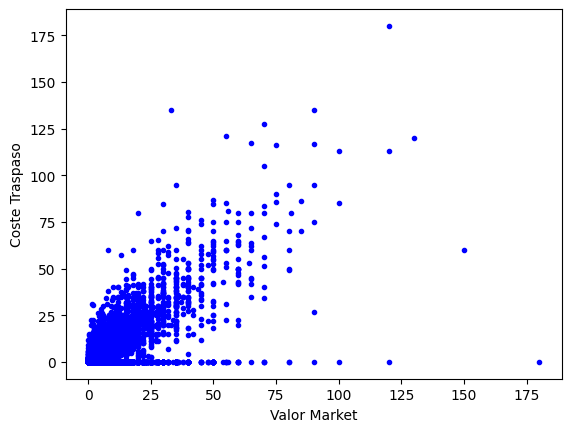

In [33]:
# Representación gráfica del conjunto de datos
plt.plot(df_reg['market_value_in_eur'], df_reg['transfer_fee'], "b.")
plt.xlabel("Valor Market")
plt.ylabel("Coste Traspaso")
plt.show()

In [34]:
from sklearn.linear_model import LinearRegression
# Construcción del modelo y ajuste de la función hipótesis
lin_reg = LinearRegression()
lin_reg.fit(df_reg['market_value_in_eur'].values.reshape(-1, 1), df_reg['transfer_fee'].values)

LinearRegression()

In [35]:
# Predicción para el valor mínimo y máximo del conjunto de datos de entrenamiento
X_min_max = np.array([[df_reg["market_value_in_eur"].min()], [df_reg["market_value_in_eur"].max()]])
print(X_min_max)
y_train_pred = lin_reg.predict(X_min_max)
print(y_train_pred)

[[1.0e-02]
 [1.8e+02]]
[ -0.3817272 111.5914893]


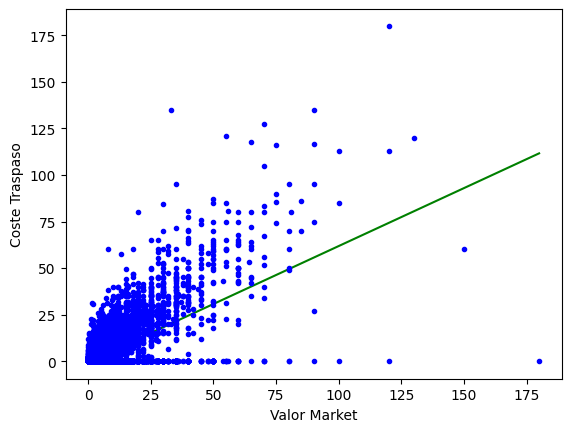

In [36]:
# Representación gráfica de la función hipótesis generada
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(df_reg['market_value_in_eur'], df_reg['transfer_fee'], "b.")
plt.xlabel("Valor Market")
plt.ylabel("Coste Traspaso")
plt.show()

In [37]:
x_new = np.array([[120]]) # Isak

# Predicción del coste que tendría el traspaso
coste = lin_reg.predict(x_new)

print("El coste del traspaso de Isak sería:", int(coste[0]), "millones de euros")

El coste del traspaso de Isak sería: 74 millones de euros


In [38]:
import plotly.express as px

# Filter out rows where either transfer_fee or market_value_in_eur is zero or null
scatter_data = df[(df['transfer_fee'] > 25000000) & (df['market_value_in_eur'] > 25000000)]

# Create an interactive scatter plot with a trendline (correlation line)
fig = px.scatter(
    scatter_data,
    x='market_value_in_eur',
    y='transfer_fee',
    title='Interactive Scatterplot: Transfer Fee vs Market Value in EUR',
    labels={'market_value_in_eur': 'Market Value (in EUR)', 'transfer_fee': 'Transfer Fee (in EUR)'},
    hover_data=['player_name', 'transfer_season'],
    trendline='ols'  # Add Ordinary Least Squares (OLS) trendline
)

# Show the plot
fig.show()

In [39]:
 #Calculate the correlation between transfer_fee and market_value_in_eur
correlation = scatter_data['transfer_fee'].corr(scatter_data['market_value_in_eur'])
print(f'Correlation between Transfer Fee and Market Value: {correlation:.4f}')

Correlation between Transfer Fee and Market Value: 0.6316


In [40]:
from sklearn.metrics import mean_squared_error
y_pred=np.array(df_reg["market_value_in_eur"])
y_train_pred = lin_reg.predict(y_pred.reshape(-1,1))
print(y_train_pred)
rmse=np.sqrt(mean_squared_error(df_reg["transfer_fee"],y_train_pred))
rmse

[27.60691111  7.07734755  2.10048366 ...  0.07863271  0.70074069
 -0.35684289]


np.float64(4.343203905444438)

## Regresión Lineal Múltiple

In [41]:
x_clean= df_clean.copy()
del x_clean["transfer_fee"]
x_clean

,player_id,from_club_id,to_club_id,market_value_in_eur,transfer_season_00/01,transfer_season_01/02,transfer_season_02/03,transfer_season_03/04,transfer_season_04/05,transfer_season_05/06,...,transfer_season_24/25,transfer_season_25/26,transfer_season_26/27,transfer_season_93/94,transfer_season_94/95,transfer_season_95/96,transfer_season_96/97,transfer_season_97/98,transfer_season_98/99,transfer_season_99/00
1,1138758,336,631,45000000.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,195778,79,27,12000000.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,569033,39,27,4000000.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,626913,398,380,15000000.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,743395,9010,15,1500000.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79055,29391,3034,371,50000.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
79062,19041,5299,116,50000.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
79063,14555,399,31,750000.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
79066,12029,1049,7971,1750000.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
# Construcción del modelo y ajuste de la función hipótesis
lin_reg = LinearRegression()

lin_reg.fit(x_clean, df_clean['transfer_fee'])

LinearRegression()

In [43]:
#.values.reshape(-1, 1

In [44]:
y_train_pred = lin_reg.predict(x_clean)
rmse=np.sqrt(mean_squared_error(df_reg["transfer_fee"],y_train_pred))
rmse

np.float64(4224461.5906925835)

## Modelo Random Forest Regressor

In [45]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,max_depth=5)


In [46]:
df_clean["transfer_fee"]=df_clean["transfer_fee"]/100
df_clean["market_value_in_eur"]=df_clean["market_value_in_eur"]/100

train_set, val_set, test_set = train_val_test_split(df_clean)


/tmp/ipython-input-3669319861.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-3669319861.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [47]:
X_train_set=train_set.drop("transfer_fee",axis=1)
y_train_set=train_set["transfer_fee"]
X_val_set=val_set.drop("transfer_fee",axis=1)
y_val_set=val_set["transfer_fee"]
X_test_set=test_set.drop("transfer_fee",axis=1)
y_test_set=test_set["transfer_fee"]

In [48]:
model.fit(X_train_set,y_train_set)

RandomForestRegressor(max_depth=5)

In [49]:

y_val_pred = lin_reg.predict(X_val_set)
rmse=np.sqrt(mean_squared_error(y_val_set,y_val_pred))
rmse

np.float64(680377.3008705601)

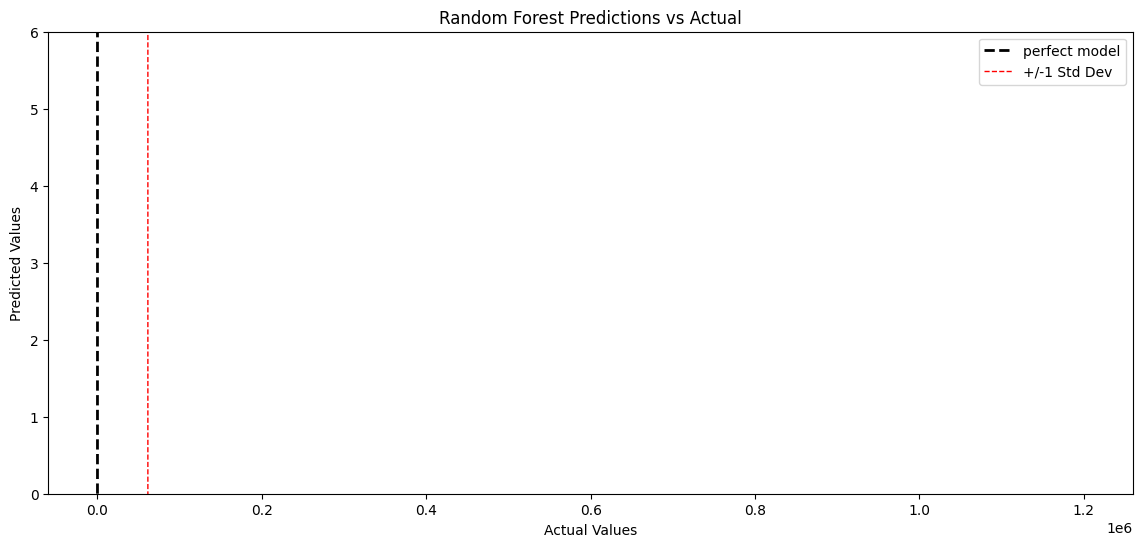

In [50]:
# Random Forest plot
y_test=y_val_set
y_pred_rf=y_val_pred
std_y = np.std(y_test)
plt.figure(figsize=(14, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color="blue",ec='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2,label="perfect model")
plt.plot([y_test.min(), y_test.max()], [y_test.min() + std_y, y_test.max() + std_y], 'r--', lw=1, label="+/-1 Std Dev")
plt.plot([y_test.min(), y_test.max()], [y_test.min() - std_y, y_test.max() - std_y], 'r--', lw=1, )
plt.ylim(0,6)
plt.title("Random Forest Predictions vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()

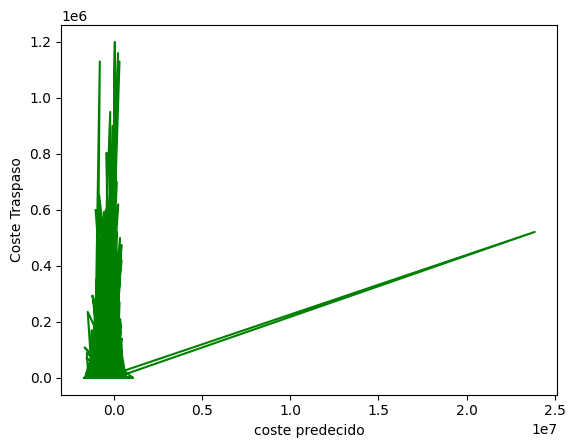

In [51]:

# Representación gráfica de la función hipótesis generada
y_val_set=y_val_set
y_val_pred=y_val_pred
plt.plot(y_val_pred,y_val_set, "g-")
plt.xlabel("coste predecido")
plt.ylabel("Coste Traspaso")
plt.show()